# Tasks 2020

Machine Learning and Statistics Tasks Assessment 2020.

Jody Bradley (G00387878@gmit.ie)


#### Task 1. Write a Python function called sqrt2 that calculates and prints to the screen the square root of 2 to 100 decimal places. Your code should not depend on any module from the standard library or otherwise. You should research the task first and include references and a description of your algorithm.

Many mathermatical operations have an opposite operation. Finding the square root of a number is the inverse of squaring a number. The square of a number is that number times itself, while the square root of a number x is the number that gives x when multiplied by itself, i.e. the square root of 100 is 10, becase 10 * 10 = 100 [1].

There are several ways to calculate the square root of a number. Let's take a look at a simple way of calculating a square root of a number without the use of a calculator. Let's look at finding the square root of 2.

1. Estimate - get a starting point by finding two perfect square roots that your number is between. As we're looking to find the square root of 2, our two perfect square roots are 1 and 4.

2. Divide - next we need to divide our number by one of those square roots: 2 / 1 = 2

3. Average - take the average of the result of step 2 (2) and the root (1): 2 + 1 = 3 / 2 = 1.5

4. Repeat steps 2 and 3: 2 / 1.5 = 1.33 + 1.5 = 2.83 / 2 = 1.41

So based on the above, the square root of  = 1.41, which is correct to 2 decimal places.

To get a more accurate result, we can calculate the square root of a number by using Newton's method. Newton's method is a root-finding algorithm whcih produces successively better approximations to the roots (or zeroes) of a real-valued function [2].

To find the square root $z$ of a number $x$, we can iterate using the following equation.

$$ z_{next} = z - \frac{z^2 - x}{2z} $$

Computers typically compute the square root of x using a loop. Starting with some guess $z$, we adjust $z$ based on how close $z^2$ is to $x$, producing a better guess. Repeating this adjustment makes the guess better and better until we reach an answer that is as close to the actual square root as can be [3].



#### Method
Writing a function to find the square root of a number $x$.

In [15]:
# simple square root function

def sqrt(x):
    return x ** 0.5

sqrt(2)

1.4142135623730951

In [16]:
def sqrt(x):
    """
    A function to calculate the square root of a number x:
    """
    # Initial guess for the square root z:
    z = x / 2
    # Loop until we're happy with the accuracy using the abs method to ensure that only a positive number is used.
    while abs(x - z * z) > 0.000001:
        # Calculate a better guess for the square root.
        z -= (z*z - x) / (2 * z)
    # Return the approximate square root of x.
    return z
# Show the square root of 2

In [17]:
# Now lets test the function on the number 2.
sqrt(2)

1.4142135623746899

#### Finding the square root to 100 decimal places

Our function above finds the square root of a number $x$ to 16 decimal places. Next we'll try to find the square root of a number to 100 decimal places, using the formula which we came up with previously.

First let's use the Python decimal module to calculate the square root of 2 to 100 decimal places, for comparative purposes. 

In [18]:
# Comparing the above result with the decimal module.
from decimal import *
getcontext().prec = 100
Decimal(2).sqrt()

Decimal('1.414213562373095048801688724209698078569671875376948073176679737990732478462107038850387534327641573')

Let's see if we can achieve a similar result by amending our function above. 

In [21]:
def sqrt(x):
    """
    A function to calculate the square root of a number x:
    """
    # Initial guess for the square root z:
    z = x / 2
    # Loop until we're happy with the accuracy using the abs method to ensure that only a positive number is used.
    while abs(x - z * z) > 0.000001:
        # Calculate a better guess for the square root.
        z -= (z*z - x) / (2 * z)
    # Return the approximate square root of x to 100 decimal places.
    return (f'{z:.100f}')


In [22]:
sqrt(2)

'1.4142135623746898698271934335934929549694061279296875000000000000000000000000000000000000000000000000'

While our function has returned the square root of two "to 100 decimal places", there are inaccuracies after decimal point 9. While we generally use the decimal system (base 10), the computer uses the binary system (base 2). The Python documentatiion states that "most decimal fractions cannot be represented exactly as binary fractions. A consequence is that, in general, the decimal floating-point numbers you enter are only approximated by the binary floating-point numbers actually stored in the machine" [5]. So how do we get around this?

Below is a code solution found on Stack Overflow [6]:

In [53]:
def sqrt2():
    x = 2 * 10 ** 200

    r = x

    def test_diffs(x, r):
        d0 = abs(x - r**2)
        dm = abs(x - (r-1)**2)
        dp = abs(x - (r+1)**2)
        minimised = d0 <= dm and d0 <= dp
        below_min = dp < dm
        return minimised, below_min

    while True:
        oldr = r
        r = (r + x // r) // 2

        minimised, below_min = test_diffs(x, r)
        if minimised:
            break

        if r == oldr:
            if below_min:
                r += 1
            else:
                r -= 1
            minimised, _ = test_diffs(x, r)
            if minimised:
                break

    print(f'{r // 10**100}.{r % 10**100:0100d}')

In [55]:
sqrt2()

1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


#### References
[1] Square Roots; http://www.math.com/school/subject1/lessons/S1U1L9DP.html 

[2] Newton's Method; https://en.wikipedia.org/wiki/Newton%27s_method 

[3] A Tour of Go; Exercise: Loops and Functions; https://tour.golang.org/flowcontrol/8

[4] McLoughlin, I 2020, Tasks - Getting Started, lecture notes, Machine Learning, GMIT, delivered 04/10/2020

[4] https://stackoverflow.com/questions/6149006/display-a-float-with-two-decimal-places-in-python

[5]. https://docs.python.org/3/tutorial/floatingpoint.html

[6]. https://stackoverflow.com/questions/64278117/is-there-a-way-to-create-more-decimal-points-on-python-without-importing-a-libra


---------------------------------------------------------------

#### Task 2. The Chi-squared test for independence is a statistical hypothesis test like a t-test. It is used to analyse whether two categorical variabales as independent. The Wikipedia article gives the table below as an example [1], stating the Chi-squared value based on it is approximately 24.6. Use scipy.stats to verify this value and calculate the associated p value. You should include a short note with references justifying your analysis in a markdown cell.

The Chi-squared test is used for testing relationships between categorical variables. The null hypothesis of the Chi-squared test is that no relationship exists between the categorical variables, i.e. they are independent [2].

The table below has been taken from the example on the Wikipedia article [1] and is representative of a city of 1,000,000 residents with four neighborhoods: A, B, C and D. A random sample of 650 residents is taken and their occupation is recorded as "white collar", "blue collar" or "no collar". The null hypothesis is that each person's neighborhood of residence is independent of the person's occupational classification. The data is tabulated as:

|  | A | B | C | D | Total |
| --- | --- | --- | --- | --- | --- |
| White Collar | 90 | 60 | 104 | 95 | 349 |
| Blue Collar | 30 | 50 | 51 | 20 | 15 |
| No Collar | 30 | 40 | 45 | 35 | 150 |
| Total | 150 | 150 | 200 | 150 | 650 |

The Wikipedia article outlines the following example:

_"Let us take the sample living in neighbourhood A, 150, to estimate what proportion of the whole 1,000,000 live in neighbourhood A. Similarly, we take $\frac{349}{650}$ to estimate what proportion of the 1,000,000 are white-collar workers. By the assumption of independence under the hypothesis we should "expect" the number of white-collar workers in neighborhood A to be:_

$$ 150  *  \frac{349}{650} = 80.54 $$

_Then in that "cell" of the table, we have:_

$$ \frac{(observed - expected)^2}{expected} = \frac{(90-80.54)^2}{80.54} = 1.11 $$

_The sum of these quantities over all of the cells is the test statistic; in this case c. 24.6. Under the null hypothesis, this sum has approximately a chi-squared distribution whose number of degrees of freedom are:_

$$ (number.of.rows- 1) (number.of.columns -1) = (3-1)(4-1)=6 $$

_If the test statistic is improbably large according to that chi-squared distribution, then one rejects the null hypothesis of independence."[1]_

So based on the above Wikipedia example, our Chi-squared number for our sample is 24.6.

#### Hypothesis

The two hypotheses are:
* Neighbourhood and occupation are independent.
* Neighbourhood and occupation are not independent.

#### Method

##### To find the Chi Square [5]
1. Lay the data out in a table.
2. Add up rows and columns.
3. Calculate expected value for each entry.
4. Subtract expected from observed, square it, then divide by expected, for each cell (as per the Wikipedia article extract above).
5. Add up the calculated values from each cell to find the Chi-square (in this case, we know that the the sum of these quantities over all of the cells is c. 24.6).

##### To find the Degree of Freedom
$$ (number.of.rows- 1) (number.of.columns -1) $$
In this case we know that the Degrees of Freedom = 6

##### To find the p-value
This is a complicated calculation. However, we can find the p-value using scipy.stats in Python, as outlined below.


In [8]:
# Now we will run a test using Python to verify the Chi-square number and to find the p-value.

import numpy as np

# Set out our data table
wc = [90, 60, 104, 95]
bc = [30, 50, 51, 20]
nc = [30, 40, 45, 35]

pop = np.array([wc, bc, nc])

# Run the test using the SciPy Stats library [3]
from scipy import stats

chi2_stat, p_val, dof, ex = stats.chi2_contingency(pop)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)


===Chi2 Stat===
24.5712028585826


===Degrees of Freedom===
6


===P-Value===
0.0004098425861096696


===Contingency Table===
[[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]


The above output shows the following:
* The first value shows the chi-square statistic as 24.57. This is rounded up to 24.6 which is in line with the chi-square number given in the Wikipedia article.
* The second value shows the Degree of Freedom as 6. This is in line with our calculation above.
* The third value is the p-value of 0.0004. This is used to determine the independence.

A p-value is a measure of the probability that an observed difference could have occurred by random chance. A lower p-value means a greater statistical significance of the observed difference [4]. Generally, we are looking for a threshold at either 0.05 or 0.01 [3]. In this case, as the p-value is very low (at 0.0004), we can reject the null hypothesis and conclude that our test is significant and that the job category of the population  is linked to their neighbourhood.

#### References
[1] Wikipedia contributors, “Chi-squared test — Wikipedia, the free encyclopedia,”
2020, [Online; accessed 10-November-2020]. [Online]. Available: https://en.wikipedia.org/w/index.php?title=Chi-squared_test&oldid=983024096

[2] Using Chi-Square Statistic in Research - https://www.statisticssolutions.com/using-chi-square-statistic-in-research/

[3] Running Chi-Square Tests with Die Roll Data in Python - https://towardsdatascience.com/running-chi-square-tests-in-python-with-die-roll-data-b9903817c51b

[4] P-Value definition - https://www.investopedia.com/terms/p/p-value.asp

[5] Chi-square test - https://www.mathsisfun.com/data/chi-square-test.html

--------------------------------

#### Task 3. The standard deviation of an array of numbers x is calculated using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x)).

#### However, Microsoft Excel has two different versions of the standard deviation calculation, STDEV.P and STDEV.S . The STDEV.P function performs the above calculation but in the STDEV.S calculation the division is by len(x)-1 rather than len(x). 

#### Research these Excel functions, writing a note in a Markdown cell about the difference between them. Then use numpy to perform a simulation demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample. Note that part of this task is to figure out the terminology in the previous sentence.

The standard deviation is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values are close to the mean of the set, while a high standard deviation indicates that the values are spread out over a wider range [1]. To put it simply, the standard deviation is a measure of "how spread out the numbers are" [2].

#### Method
To calculate the standard deviation of a set of values manually we can:
1. Work out the mean of the data set.
2. For each number in the data set, subtract the mean and square the result.
3. Add up all of the values from the previous step and find the mean of those values.
4. Take the square root of that.

To use a simple example as outlined on the "Maths is Fun" website [2]:

_A sample of rose bushes contains 20 values. The number of flowers on each bush is 9, 2, 5, 4, 12, 7, 8, 11, 9, 3, 7, 4, 12, 5, 4, 10, 9 ,6, 9, 4. Work out the Standard Deviation_

Using the method as outlined above:
1. The mean of the data set is:
$ \frac{sum.of.the.values}{number.of.values} = \frac{140}{20} = 7$


2. For each number in the data set, subtract the mean and square the result, which gives us:
4, 25, 4, 9, 25, 0, 1, 16, 4, 16, 0, 9, 25, 4, 9, 9, 4, 1, 4, 9


3. Add up all of the values from the previous step and find the mean of those values, which gives us:
$\frac{178}{20} = 8.9$


4. Take the square root of that:
= 2.9832867780352595529116...

#### Python 

The standard deviation of an array of numbers x is calculated using numpy as np.sqrt(np.sum((x - np.mean(x))**2)/len(x)).

#### Excel

Excel has has two different versions of the standard deviation calculation, STDEV.P and STDEV.S.

The STDEV.P function is used when the data set represents the entire population (the "P" stands for population).  

The STDEV.S function is used when the data set is a sample of the entire population (the "S" stands for sample).

In the STDEV.P function, the squared deviation is divided by the total number of arguments, mostly represented as N. Therefore STDEV.P uses the same formula as the numpy formula, i.e. np.sqrt(np.sum((x - np.mean(x))**2)/len(x)).

In STDEV.S, the squared deviation is divided by the total number of sample -1. It is represented as N-1 [3]. STDEV.S uses a similar forumula as the numpy formula but the division is by len(x)-1 rather than len(x), i.e. np.sqrt(np.sum((x - np.mean(x))**2)/len(x) -1).

#### Bessel's correction

In statistics, Bessel's correction is the use of n-1 (as seen in the STDEV.S formula above), instead of n (where n is the number of observations in a sample), in order to correct the bias in the estimation of the population standard deviation [5]. 

#### Hypothesis
The STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample than using the STDEV.P calculation.

#### Interpretation 
We are being asked to show that the STDEV.S calculation in excel is a better estimate for the standard deviation of a data set when performed on a sample of observations from that data set, than using the STDEV.P calculation.

#### Test

Let's run the data set through the standard deviation functions in Excel using the STDEV.P and STDEV.S functions.

The results are as follows:

- STDEV.P = 2.983287
- STDEV.s = 3.060788

In [9]:
# Let's run a Python function (np.std) to find the standard deviation of the rose bush data set used above.

import numpy as np

arr = [9, 2, 5, 4, 12, 7, 8, 11, 9, 3, 7, 4, 12, 5, 4, 10, 9 ,6, 9, 4]
std = np.std(arr)

print("The standard deviation is", std)


The standard deviation is 2.9832867780352594


In [10]:
# Compare this to carrying out the calculation using the formula of np.sqrt(np.sum((x - np.mean(x))**2)/len(x))
import numpy as np

arr = [9, 2, 5, 4, 12, 7, 8, 11, 9, 3, 7, 4, 12, 5, 4, 10, 9 ,6, 9, 4]
np.sqrt(np.sum((arr - np.mean(arr))**2)/len(arr))

2.9832867780352594

In [11]:
# The result of 2.9832867780352594 is the same as that reached using the np.std() function and through the manual calculation.

# Next, let's try using a sample of 15 observations from the data set of 20 observations.

import numpy as np

smpl = [9, 2, 5, 4, 12, 7, 8, 11, 9, 3, 7, 4, 12, 5, 4]
np.sqrt(np.sum((smpl - np.mean(smpl))**2)/len(smpl)-1)

3.0044411571316667

In [12]:
# Using the STDEV.P formula on the same sample of the population gives the following result:

smpl = [9, 2, 5, 4, 12, 7, 8, 11, 9, 3, 7, 4, 12, 5, 4]
np.sqrt(np.sum((smpl - np.mean(smpl))**2)/len(smpl))

3.1664912232101114

#### Results

The standard deviation of the full data set (of 20 observations) is 2.9832867780352594.

Taking a sample of 15 observations, we ran the STDEV.P and STDEV.S formulas which yielded the following results:

- STDEV.S = 3.0044411571316667
- STDEV.P = 3.1664912232101114

Compared to the standard deviation of 2.9832867780352594.

#### Conclusion 

The evidence above shows that using the STDEV.S calculation gives a better estimate for the standard deviation of a population when performed on a sample than using the STDEV.P calculation. However, if the full sample is provided, using the STDEV.P calculation provides a more accurate result.

#### References
[1] Standard Deviation - https://en.wikipedia.org/wiki/Standard_deviation

[2] Standard Deviation - https://www.mathsisfun.com/data/standard-deviation-formulas.html

[3] How To Use Excel STDEV.P Function - https://www.exceltip.com/statistical-formulas/how-to-use-excel-stdev-p-function.html

[4] numpy.std() in Python - https://www.geeksforgeeks.org/numpy-std-in-python/

[5] Bessel's Correction - https://en.wikipedia.org/wiki/Bessel%27s_correction

#### Task 4. Use scikit-learn to apply k-means clustering to Fisher’s famous Iris data set. You will easily obtain a copy of the data set online. Explain in a Markdown cell how your code works and how accurate it might be, and then explain how your model could be used to make predictions of species of iris.

The k-means algorithm clusters data by trying to separate samples in groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares (see below). This algorithm requires the number of clusters to be specified. It scales well to large number of samples and has been used across a large range of application areas in many different fields [1].



In [22]:
# Import the libraries required for this task.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster as skcl
import sklearn.datasets as skds


In [25]:
# Load the Iris data set from sklearn datasets.
iris = skds.load_iris()

In [26]:
# Define targets and predictors.
X = iris.data[:, :2]
y = iris.target

In [76]:
# Perform kmeans fitting.
kmeans = skcl.KMeans(n_clusters=3, random_state=0).fit(X)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [75]:
# Identify the center points of the data.
kmeans.cluster_centers_

array([[5.006     , 3.428     ],
       [6.81276596, 3.07446809],
       [5.77358491, 2.69245283]])

Text(0.5, 1.0, 'Predicted')

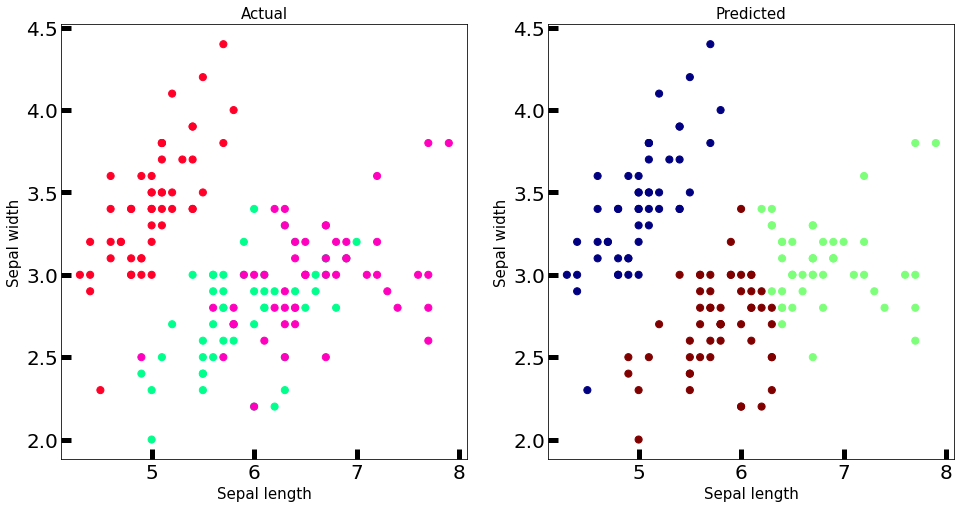

In [97]:
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))

axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow', s=50)

axes[1].scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='jet', s=50)

axes[0].set_xlabel('Sepal length', fontsize=15)
axes[0].set_ylabel('Sepal width', fontsize=15)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=15)
axes[1].set_xlabel('Sepal length', fontsize=15)
axes[1].set_ylabel('Sepal width', fontsize=15)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].set_title('Predicted', fontsize=15)



#### Conclusion
In the figure "Actual", the Iris setosa is represented by the red. As the Iris setosa is easily identified from the other two species by its sepal length and sepal width attributes, the k-means algoritum (represented in the figure titled "Predicted") was 100% accurate in its prediction.

Howevever, as there is more overlap between the iris versicolor and virginica species in sepal length/sepal width, the k-means algorithm was less accurate in this instance.

#### References
[1] SciKit Learn: 2.3 Clustering - https://scikit-learn.org/stable/modules/clustering.html#k-means

[2] Simple K-means clustering on the Iris dataset - https://www.kaggle.com/tonzowonzo/simple-k-means-clustering-on-the-iris-dataset

[3] Predicting Iris Flower Species with K-Means Clustering in Python - https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee

[4] McLoughlin, I 2020, K-Means Clustering, lecture notes, Machine Learning, GMIT, delivered 22/11/2020